In [ ]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow
tensorflow.__version__

'2.9.2'

In [ ]:
train_dir = '/content/drive/MyDrive/train'
valid_dir = '/content/drive/MyDrive/test'

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(valid_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 394 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.7019 - acc: 0.5020

50/50 [==============================] - 110s 2s/step - loss: 0.7019 - acc: 0.5020 - val_loss: 0.6896 - val_acc: 0.4975
Epoch 2/10
50/50 [==============================] - 21s 414ms/step - loss: 0.6784 - acc: 0.5740
Epoch 3/10
50/50 [==============================] - 20s 395ms/step - loss: 0.6417 - acc: 0.6268
Epoch 4/10
50/50 [==============================] - 22s 442ms/step - loss: 0.5806 - acc: 0.7243
Epoch 5/10
50/50 [==============================] - 20s 394ms/step - loss: 0.5796 - acc: 0.6960
Epoch 6/10
50/50 [==============================] - 20s 398ms/step - loss: 0.4993 - acc: 0.7730
Epoch 7/10
50/50 [==============================] - 20s 396ms/step - loss: 0.4233 - acc: 0.8159
Epoch 8/10
50/50 [==============================] - 20s 393ms/step - loss: 0.3903 - acc: 0.8350
Epoch 9/10
50/50 [==============================] - 20s 394ms/step - loss: 0.3750 - acc: 0.8461
Epoch 10/10
50/50 [==============================] - 20s 395ms/step - loss: 0.3398 - acc: 0.8760


In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and Validation Accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and Validation Loss')
# plt.legend()

# plt.show()

In [ ]:
acc_median = np.median(acc)
acc_median

0.7486730515956879

In [ ]:
loss_std = np.std(loss)
loss_std

0.12661638692345614

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
from tensorflow.keras.preprocessing import image

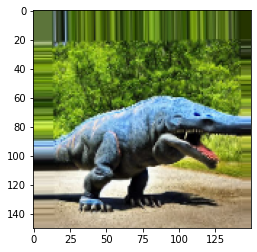

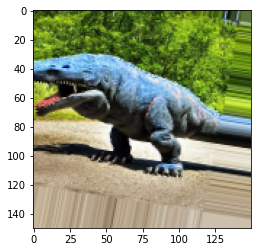

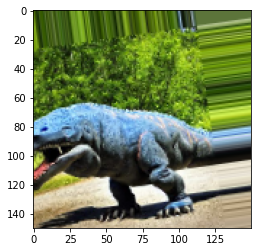

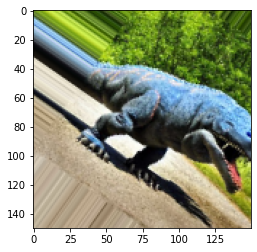

In [ ]:
fnames = [os.path.join(train_dir+"/dino", fname) for
    fname in os.listdir(train_dir+"/dino")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=40)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.4936 - acc: 0.7622

50/50 [==============================] - 43s 859ms/step - loss: 0.4936 - acc: 0.7622 - val_loss: 0.3842 - val_acc: 0.8350
Epoch 2/10
50/50 [==============================] - 37s 743ms/step - loss: 0.4661 - acc: 0.7823
Epoch 3/10
50/50 [==============================] - 37s 738ms/step - loss: 0.4567 - acc: 0.7911
Epoch 4/10
50/50 [==============================] - 37s 742ms/step - loss: 0.4485 - acc: 0.7898
Epoch 5/10
50/50 [==============================] - 39s 784ms/step - loss: 0.4406 - acc: 0.8093
Epoch 6/10
50/50 [==============================] - 38s 746ms/step - loss: 0.4286 - acc: 0.8043
Epoch 7/10
50/50 [==============================] - 37s 740ms/step - loss: 0.4241 - acc: 0.8049
Epoch 8/10
50/50 [==============================] - 37s 739ms/step - loss: 0.4157 - acc: 0.8181
Epoch 9/10
50/50 [==============================] - 37s 741ms/step - loss: 0.4041 - acc: 0.8118
Epoch 10/10
50/50 [==============================] - 39s 784ms/step - loss: 0.3828 - acc: 0.8369


In [ ]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)



In [ ]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.38418564200401306

In [ ]:
val_acc_aug[:1]

[0.8350253701210022]

In [ ]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan